get the dataset ready for training

In [51]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
IMG_SIZE=256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS =50

In [52]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE
)
class_names = dataset.class_names
class_names

Found 2152 files belonging to 3 classes.


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

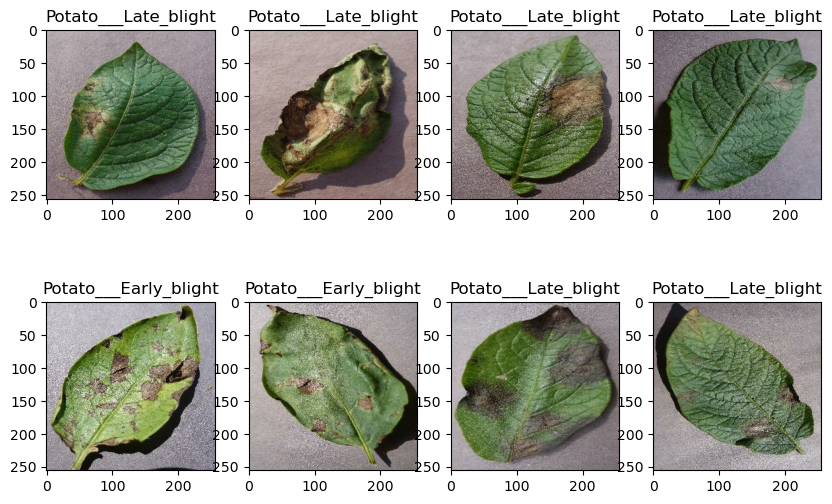

In [29]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) #try to visualise the imgs in folder
        plt.title(class_names[label_batch[i]])

Split 80-20 for train and split wehre the 20 test is split into 10 validation and 10 test

In [32]:
train_size = 0.8
len(dataset)*train_size #gives 54.400
train_ds = dataset.take(54)
len(train_ds)

54

In [35]:
test_ds=dataset.skip(54) 
len(test_ds)

14

In [36]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [41]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [42]:
test_ds = test_ds.skip(6)
len(test_ds)

2

Function takes tensorflow dataset, split ratio , shuffle size and return the values of what was done above

In [48]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 10000):
        assert (train_split + test_split + val_split) == 1
        
        ds_size = len(ds)
        
        if shuffle:
            ds = ds.shuffle(shuffle_size, seed=12)
        
        train_size = int(train_split * ds_size)
        val_size = int(val_split * ds_size)
        
        train_ds = ds.take(train_size)    
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
        
        return train_ds, val_ds, test_ds
    
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


Cache , shuffle and prefetch the dataset


In [49]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [58]:
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = tf.keras.Sequential([
    Resizing(IMG_SIZE, IMG_SIZE),
    Rescaling(1./255)
])


In [63]:
from tensorflow.keras.layers import RandomFlip, RandomRotation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])